## Compare filters

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from gcm_filters import filter
from gcm_filters.kernels import GridType
from gaussian_filter import gaussian_filter
import xarray as xr


Script parameters

In [9]:
filter_scale=4

Read the data from North Atlantic


In [34]:
from read_data import read_data

grid_data, data = read_data()
grid_data = grid_data.compute().reset_coords()

data = data['usurf'].isel(time=0).sel(xu_ocean=slice(-100, -0),
                                      yu_ocean=slice(-50, 50)).compute()

Question: how do we address continents?

In [15]:
grid_data = grid_data.sel(xu_ocean=slice(-100, 0), yu_ocean=slice(-50, 50))
grid_data_save = grid_data
grid_data = grid_data[['dxt', 'dyt']]

Problem: we need the grid vars to be on the same grid as the field to
be filtered. Here I've interpolated, but I think this is not right,
we can probably just redefine the coords of dxt and dyt to be those of the
velocities, we'll just have to be careful.

In [5]:
grid_data = grid_data.interp(dict(xt_ocean=data.xu_ocean,
                                  yt_ocean=data.yu_ocean))

Create the filter and print its specs

In [10]:
cartesian_filter = filter.Filter(filter_scale, dx_min=1, n_steps=10,
                                 filter_shape=filter.FilterShape.GAUSSIAN,
                                 grid_vars=grid_data[['dxt', 'dyt']],
                                 grid_type=GridType.MOM5)
print(cartesian_filter.filter_spec)

FilterSpec(n_lap_steps=10, s_l=array([ 0.86907727,  2.13312077,  4.15395528,  6.66924834,  9.47988803,
       12.34589824, 15.01740098, 17.25956779, 18.87480349, 19.7392088 ]), n_bih_steps=0, s_b=array([], dtype=complex128))


Carry out filtering operation

In [11]:
filtered_data = cartesian_filter.apply(data, dims=['yu_ocean', 'xu_ocean'])

Plot the result

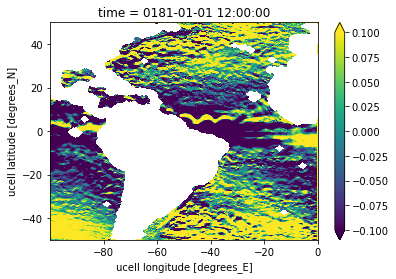

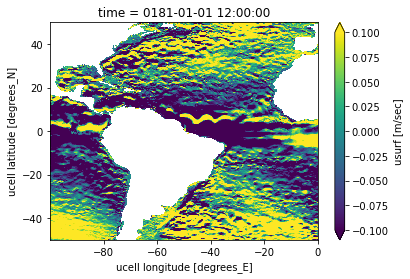

In [12]:
plt.figure()
filtered_data.plot(vmin=-0.1, vmax=0.1)
plt.figure()
data.plot(vmin=-0.1, vmax=0.1)
plt.show()

Not much of a difference to say the least...

Now with a standard Gaussian filter

In [37]:
grid_data = grid_data_save
data2 = data.fillna(0.)
filtered_data2 = gaussian_filter(data2, grid_data, scale=4, mode='own')

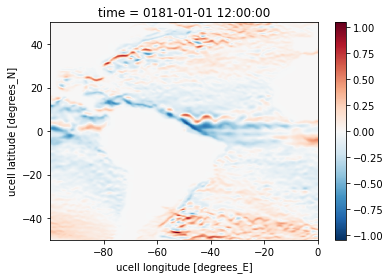

In [40]:
plt.figure()
filtered_data2.plot()